# Scikit-Learn (sklearn)

Below are useful functions of the Scikit-Learn library

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on the data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [39]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [40]:
#Create X (features matrix)
X = heart_disease.drop("target", axis=1)

#Create y (Labels)
y = heart_disease["target"]

In [41]:
#Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
#Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [43]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
# 3. Fit the model/algorithm and use it to make predictions on the data
y_label = clf.predict(np.array([0, 2, 3, 4]))

/Users/hameed/Desktop/WebDevelopment/sample_project/env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_preds = clf.predict(X_test)
y_preds

In [ ]:
y_test

In [ ]:
#4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

In [ ]:
confusion_matrix(y_test, y_preds)

In [ ]:
accuracy_score(y_test, y_preds)

In [ ]:
#Improve a model
#Try different amount of n_estimators
import numpy as np
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")

In [ ]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [ ]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(X_test, y_test)

In [ ]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

# 1. Getting our data ready to be used with machine learning

# Three main things we have to do:
    1. Split the data into features and labels (usually 'X' & 'Y')
    2. Filling ( also called imputing) or disregarding missing value
    3. Converting non-numerical values to numerical values (feature encoding)

In [ ]:
heart_disease.head()

In [ ]:
X = heart_disease.drop("target", axis=1)
X.head()

In [ ]:
y = heart_disease["target"]
y.head()

In [ ]:
#Split the data into trainig and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X.shape

In [ ]:
len(heart_disease)

In [ ]:
X.shape[0] * 0.8

In [ ]:
# 1.1 Make sure data is all numerical
#Example using the car values
car_sales = pd.read_csv("car-sales.csv")
car_sales.head()

In [ ]:
car_sales['Price'] = car_sales['Price'].replace('[\$\,\.]', '', regex=True).astype(int)

In [ ]:
car_sales["Price"]= car_sales["Price"]/100 

In [ ]:
car_sales

In [ ]:
car_sales.head()

In [ ]:
#Split the data into X/y
X= car_sales.drop("Price", axis=1)
y= car_sales["Price"]

#Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

In [ ]:
#Build machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
#Turn the categories into numbers to deal with issue ^
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
#^ used the one_hot encoder to change all categorical features into numbers
# so machine can process, "passthrough" is make sure the other features are ignored
# essentially turning categories into numbers
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
X.head()

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

#Essentially all we did here is below

In [ ]:
#Let's refit the model 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
X.head()

# 1.2 What if there were missing values?

1. Fill them with some value (imputation)
2. Remove the samples with missing data altogether.

In [ ]:
#Import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
#Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
#Turn the categories into numbers to deal with issue ^
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
#^ used the one_hot encoder to change all categorical features into numbers
# so machine can process, "passthrough" is make sure the other features are ignored
# essentially turning categories into numbers
transformed_X = transformer.fit_transform(X)
transformed_X

# Option 1: Fill missing data with pandas

In [ ]:
#Fill the "make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

#Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

#Fill the "Doors" columns
car_sales_missing["Doors"].fillna(4, inplace=True)


In [ ]:
#Check the dataframe again
car_sales_missing.isna().sum()

In [ ]:
#Remove rows with missing Price Values 
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
#Turn the categories into numbers to deal with issue ^
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
#^ used the one_hot encoder to change all categorical features into numbers
# so machine can process, "passthrough" is make sure the other features are ignored
# essentially turning categories into numbers
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

## Option 2: Fill missing values in scikit learn

In [ ]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

In [ ]:
#Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns
cat_features= ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("categ_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
    
])

#Transform the data
filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make", "Colours", "Doors", "Odometer (KM)"])
car_sales_filled.head()

In [ ]:
car_sales_filled.isna().sum()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colours", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
#^ used the one_hot encoder to change all categorical features into numbers
# so machine can process, "passthrough" is make sure the other features are ignored
# essentially turning categories into numbers
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

In [ ]:
#Now we've got outr data as numbers and filled (no missing values)
#Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
len(car_sales_filled)
#Model not doign good because the dataset is small

# 2. Choosing the right estimator/algorithm for your algorithm

Things to note: 
  * Sklearn refers to machine learning models, algorithms as estimators.
  * Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see 'clf' (short for classifier) used as a classification estimator
   * Regression problem - predicting a number (selling price of a car)
   
   
For what algorithm to use => https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 Picking a machine learning model for a regression problem

Using the California housing dataset from sklearn

In [ ]:
# Get California Housing dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing

In [ ]:
#Use the ensemble algorithm module

## 2.2 Choosing an estimator for a classification problem

In [ ]:
#Look at the map
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

In [ ]:
len(heart_disease)

### Looking at the map, lets try the LinearSVC algorithm

In [ ]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(X_test, y_test)

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
#Lets try ensemble algo
#Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

In summary:
    
    1. If you have structured data (in a table), use ensemble methods
    2. If you have unstructured data(e.g. images), use deep learning or transfer learning
    
    

# 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data 

### Different names for: 
    * X = features, feature variables, data
    * y = labels, targets, target variables

In [ ]:
#Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()

#Fit the model to the data
clf.fit(X_train, y_train)

#Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

In [ ]:
X.head()

  ### 3.2 Make predictions using a machine learning model
  
  2 ways to make predictions:
  
      1. predict()
      2. predict_proba

In [ ]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4])) #will not work

In [ ]:
X_test.head()

In [ ]:
 clf.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
# Compare prediction to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

### Make predictions with predict_proba()

In [ ]:
#predict proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])
#Showing the probability of the target being true or not

In [ ]:
#Let's predict() on the same data
clf.predict(X_test[:5])

In [ ]:
X_test[:5]

In [ ]:
heart_disease["target"].value_counts()

`predict()` can also be used for regression models.

## 4.Evaluating a machine learning model

### Three ways to evaluate Scikit-Learn models/estimators:
        1. Estimator's built-in `score()` method
        2. The `scoring` parameter
        3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score` method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()

#Fit the model to the data
clf.fit(X_train, y_train)


In [ ]:
#The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

Lets do the same for the regression model

### 4.2 Evaluating a model using th `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()

#Fit the model to the data
clf.fit(X_train, y_train);


In [ ]:
clf.score(X_test, y_test)

In [ ]:
#Model is trained on 5 different versions of training data, and evaluated on 5 different
#versions of the test data.
cross_val_score(clf, X, y)

In [ ]:
cross_val_score(clf, X, y, cv=10)

In [ ]:
np.random.seed(42)

#Single training and test split score
clf_single_score = clf.score(X_test, y_test)

#Take the mean of the 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

#Compare the two
clf_single_score, clf_cross_val_score

### 4.2.1 Classification model evaluation metrics

    1. Accuracy
    2. Area under the ROC curve
    3. Confusion matrix
    4. Classification report
    
Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

clf= RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)


In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

** Area under the receiver operatign characteristic curve (AUC/ROC)

* Area under the curve (AUC)
* ROC Curve

ROC curves are a comparison of a models true positive rate (tpr) versus a models false positive rate(fpr)

*True positive = model predicts 1 when the truth is 1
* False positive = model predicts 1 when the truth is 0
* True negative = model predicts 0 when the truth is 0
* False negative = model predicts 0 when truth is 1

In [ ]:
#Create X _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train, y_train)

#Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

In [ ]:
#Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#Check the false positive rates
fpr

In [ ]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC Curve given the false positive rate (fpr) and the true
    positive rate(tpr) of a model.
    """
    #plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power (baseline)
    plt.plot([0,1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

In [ ]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [ ]:
#Perfect AUC score
roc_auc_score(y_test, y_test)

** Confusion Matrix **

A confusion matrix is a quick way to compare the labels a model predicts anf the actuals
labels it was supposed to predict.

In essence, giving you an idea of where the model is getting ocnfused

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

In [ ]:
#Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])



In [ ]:
len(X_test)

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

In [ ]:
#Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

#Set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);


### Creating a confusion matrix using Scikit-Learn

To use the methods of creating a confusion matrix with Scikit-Learn you will need sklearn version 1.0+


In [ ]:
import sklearn
sklearn.__version__

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds);

### Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))


In [ ]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

To summarize classification metrics:
    
    *Accuracy is a good measure to start with if all classes are balanced(e.g. same amount of sample)
    *Precision and recall become more important when classes are imbalanced
    *If false positive predictions are worse than false negatives, aim for higher precision.
    * If false negative predictions are worse than false positives, aim for higher recall.
    * F1-score is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

1. R^2 (coefficient of determination)
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42) 

X = housing_df.drop("target", axis=1)
y=housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_test.mean()

from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_true=y_test,
         y_pred=y_test_mean)

*** Mean Absolute Error (MAE) ***
MAE is the average of the absolute differences between predictions and actual values

It givrs you an idea of how wrong your models predictions are.

#MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae



Mean Square Error

MSE is the mean of the square of the errors between actual and predicted values.

## 4.2.3 Finally using the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [ ]:
np.random.seed(42)

#Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, estimators default scoring evaluation metric is used (accuracy for evaluation models)
cv_acc



In [ ]:
#Cross-validated accuracy
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cv_acc) * 100:.2f}%")

In [ ]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

In [ ]:
#Cross-validated accuracy
print(f"The cross-validated accuracy is : {np.mean(cv_acc) * 100:.2f}%")


In [ ]:
#Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

In [ ]:
#Cross-validated precision
print(f"The cross-validated precision is : {np.mean(cv_precision)}%")

In [ ]:
#Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

In [ ]:
#Cross-validated recall
print(f"The cross-validated recall is : {np.mean(cv_recall)}")


Let's see the `scoring` parameter being used for a regression problem

## 4.3 Using different evaluation metrics as Scikit_Learn functions

The 3rd way to evaluate sckit-learn machine learning models/estimators is to use the `sklearn.metrics`

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
#Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create a model
clf = RandomForestClassifier()

#Fit Model
clf.fit(X_train, y_train)

#Make predictions
y_preds = clf.predict(X_test)

#Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")


## 5. Improving a model

First predictions = baseline predictions
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data? 
    
From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?
   
Hyperparameters vs Parameters 

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters: 

1. By Hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [ ]:
clf.get_params()

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation, and test

In [ ]:
clf.get_params()

We're going to try and adjust: 

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [ ]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparisoon on y_true labels vs. y_pred labels.
    
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [45]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into X & y
X= heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split the data into train, validation, & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid = X[train_split:valid_split]
y_valid = y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Make baseline predictions
y_preds = clf.predict(X_valid)

#Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [46]:
np.random.seed(42)

#Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

#Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


## 5.2 Hyperparameter tuning with RandomizedSearchCV


In [48]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf= RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                           param_distributions=grid,
                           n_iter=10, #numbers of models to try
                           cv=5, 
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)
                            

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/Users/hameed/Desktop/WebDevelopment/sample_project/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hameed/Desktop/WebDevelopment/sample_project/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hameed/Desktop/WebDevelopment/sample_project/env/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/hameed/Desktop/WebDevelopment/sample_project/

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [49]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [51]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [52]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [56]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [62]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf= RandomForestClassifier(n_jobs=1)

#Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf, 
                           param_grid=grid_2,
                           cv=5, 
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/Users/hameed/Desktop/WebDevelopment/sample_project/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hameed/Desktop/WebDevelopment/sample_project/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hameed/Desktop/WebDevelopment/sample_project/env/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/hameed/Desktop/WebDevelopment/sample_project/

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [63]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [64]:
gs_y_preds = gs_clf.predict(X_test)

#evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


Let's compare our models metrics

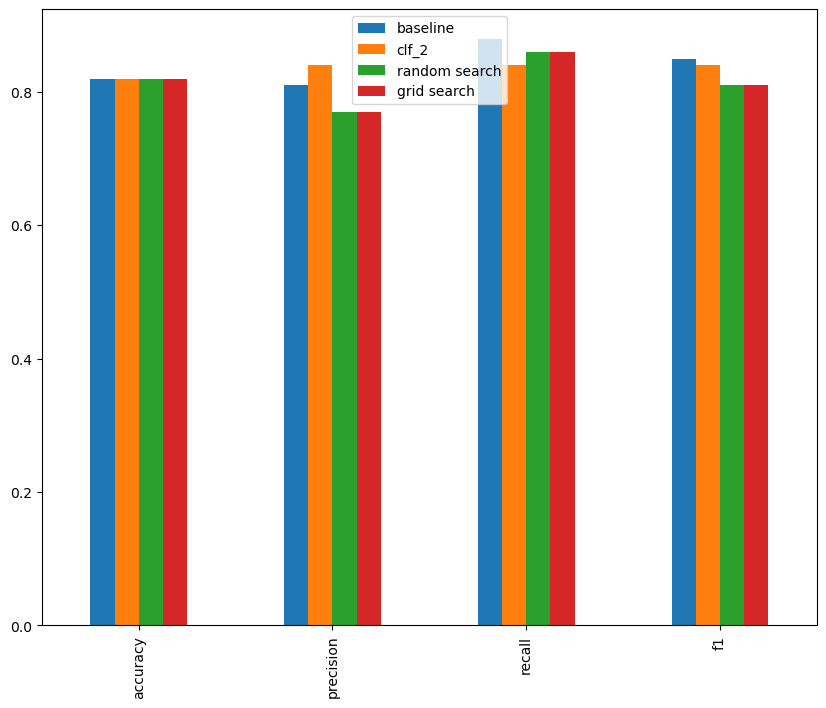

In [66]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                              "clf_2": clf_2_metrics,
                              "random search": rs_metrics,
                              "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

Pickle

In [67]:
import pickle

#Save an exisiting model to file

pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pk1", "wb"))

In [68]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pk1", "rb"))

In [69]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Joblib**

In [70]:
from joblib import dump, load

#Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")


['gs_random_forest_model_1.joblib']

In [73]:
#Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")


In [74]:
#Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together

In [76]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [77]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [78]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data


In [80]:
#Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Setup random seed
import numpy as np
np.random.seed(42)

#Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

#Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

#Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                transformers=[
                    ("cat", categorical_transformer, categorical_features),
                    ("door", door_transformer, door_feature),
                    ("num", numeric_transformer, numeric_features)
                ])
#Creating a preprocessing and modeling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", RandomForestRegressor())])

#Split data
X = data.drop("Price", axis=1)
y= data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.


In [84]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strate

ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hameed/Desktop/WebDevelopment/sample_project/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hameed/Desktop/WebDevelopment/sample_project/env/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/hameed/Desktop/WebDevelopment/sample_project/env/lib/python3.10/site-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/hameed/Desktop/WebDevelopment/sample_project/env/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/hameed/Desktop/WebDevelopment/sample_project/env/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Users/hameed/Desktop/WebDevelopment/sample_project/env/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


In [82]:
gs_model.score(X_test, y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.